## Linear Regression이란?

#### <span style="color:red">딥러닝의 딥은 통계의 결과들이 무수히 얽혀있는 즉 연산들이 복잡하다는 뜻의 Deep이다.</span>
<span style="color:red">이 연산중에서 가장 기본이 되는 연산이 바로 Linear Regression 선형회귀다.</span>
여기서는 과연 선형회귀가 어떤 것인지 차근차근 살펴보겠다

학생들과 성적의 관계
학생들마다 다 다양한 성적 분포를 가지는데...여기에 어떤 연관이 있는지 알아내고
그 연관 관계를 이용해서 결국에는 특정학생의 성적을 예측해보자.
학생들의 기말고사 성적은 [      ]에 따라 다르다

[     ]안에 시험성적을 좌우할 만한 요소들로 무엇이 있을까?
여기서 [     ]안에 들어갈 내용을 '정보'라 한다. 머신러닝과 딥러닝은 이 정보가 필요하다. 
정보를 정확히 준비해 놓기만 하면 성적을 예측하는 방정식을 만들수 있다.

이것을 수학적으로 정의하면, 성적을 변하게 하는 '정보' 요소를 X라 하고, 이 값에 따라 변하는 '성적'을 Y라 한다. 'X값이 변함에 따라 Y값도 변한다'는 정의 안에서 독립적으로 변할수 있는 값 X를 독립변수라 한다.
또한, 이 독립 변수에 따라 종속적으로 변하는 Y를 종속변수라 한다.
<span style="color:red">선형회귀는 독립변수 X를 이용해서 종속변수 Y를 예측하고 설명하는 작업을 말한다.</span>

### 예측선 그리기

기말고사를 준비하는 학생들을 대상으로 자료를 조사한 결과를 바탕으로 공부한 시간을 통해서 시험성적을 예측하자. <br/>
     X = [2,  4,  6,  8] <br/> 
     Y = [81, 93, 91, 97]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system!!') 

왼쪽이 아래로 향하고 오른쪽이 위를 향하는 선형(직선으로 표시되는 형태의 그래프)을 보인다. 선형회귀는 이 점들의 특징을 가장 잘 나타내는 선을 그리는 과정이다.  여기서 선은 곧 일차함수 그래프이며 다음과 같은 공식으로 표현된다.<br>
      <span style="color:red">y = ax + b</span>
      <br>
여기서 x값은 독립변수이고 y값은 종속변수이다. 즉, x 값에 따라서 y값은 반드시 달라진다. 다만, 정확하게 계산하려면 상수 a와 b의 값을 알아야한다.<br>

따라서 선형회귀문제는 결과적으로 a와 b값을 알아내는 문제이다.

In [31]:
X = [2,  4,  6,  8] 
y = [81, 93, 91, 97]

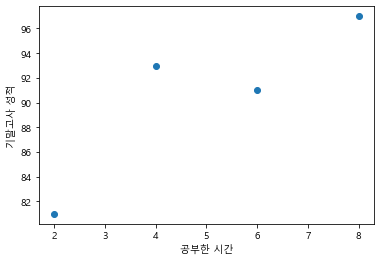

In [6]:
plt.scatter(X,y)
plt.xlabel('공부한 시간')
plt.ylabel('기말고사 성적')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

### 최소제곱법
    일차함수의 기울기 a와 절편 b를 구할수 있다
    
    a = (x-x평균)(y-y평균)의 합 / (x-x평균)**의 합
    b = y의 평균-(x의 평균x기울기a)
    
    a = 2.3    b = 79

### <span style="color:red"><center>y = 2.3x + 79</center></span>

In [32]:
mx = np.mean(X)
my = np.mean(y)

a = ((X-mx)@(y-my)) / sum((X-mx)**2)
print(a)

2.3


In [20]:
b = my - (mx*a)
print(b)

79.0


In [41]:
## 위에서 나온 기울기와 절편값을 가지고 가설을 세우자.
X = np.array(X)
y = np.array(y)
print(X, y)
predict = a*X + b
print(predict)

[2 4 6 8] [81 93 91 97]
[83.6 88.2 92.8 97.4]


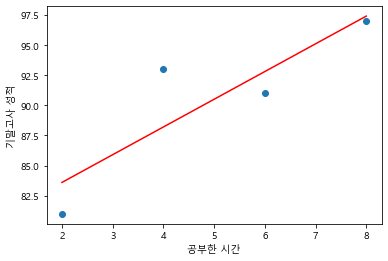

In [43]:
## 위에서 구한 a, b를 가지고 만든 가설... plot 그려보자
plt.scatter(X,y)
plt.plot(X, predict, 'r')

plt.xlabel('공부한 시간')
plt.ylabel('기말고사 성적')
plt.show()

### 평균제곱 오차(MSE : Mean Square Error)
<span style="color:red">
   $$
   \frac{1}{n}\sum_{i=1}^n(pred_i - y_i)^2
   $$
</span>

#### 평균제곱 오차가 작다는 것은 실제값과 예측값 사이의 간극이 크지 않다는 것을 말한다.
    앞으로 딥러닝과 머신러닝을 공부할때 굉장히 많이 나오는 공식으로 이 값이 작으면 작을수록 예측한값의
    정확도가 높아짐을 의미한다.
#### 선형회귀란 임의의 직선을 그어서 이에 대한 평균제곱 오차를 구하고 이 값을 가장 작게 만들어주는  a와 b값을 찾아가는 작업이다.


In [44]:
def mse(y_hat, y) :
    return ((y_hat-y)**2).mean()

In [45]:
mse(predict, y)

8.299999999999985

### MSE 실습하기

In [46]:
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]
print(x,y)

[2, 4, 6, 8] [81, 93, 91, 97]


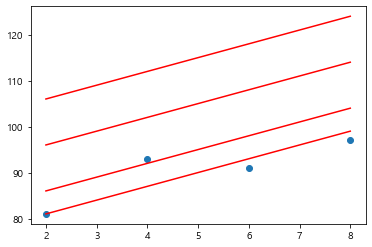

In [65]:
# 우의 훈련 데이터를 가장 잘 표현할 수 있는 선형의 직선을 찾아야 한다. 가설을 세워서 a,b를 찾아보자.
# 임의로 a, b를 지정하고 예측해보자. cost가 나올 것이다.
x = np.array(x)
y = np.array(y)

plt.scatter(x,y)
a = [3]
b = [75 ,80,90,100]
for i in a :
    for j in b :
        pred = i*x + j
        plt.plot(x, pred, 'r')

plt.show()

In [58]:
temp_a_b = [3, 76]

In [59]:
# 일차방정식 Y = aX + b 를 반환하는 함수 정의
def predict(x):
    return temp_a_b[0]*x + temp_a_b[1]

In [60]:
# 평균제곱근(MSE)공식을 그대로 파이썬 함수로 정의.
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

In [61]:
predict_result = []
for i in range(len(x)) : # 모들 x값을 한번씩 i에 대입
    predict_result.append(predict(x[i]))
    print('공부시간 = %d, 실제점수 = %d, 예측점수 = %d'%(x[i], y[i], predict(x[i])))
    

공부시간 = 2, 실제점수 = 81, 예측점수 = 82
공부시간 = 4, 실제점수 = 93, 예측점수 = 88
공부시간 = 6, 실제점수 = 91, 예측점수 = 94
공부시간 = 8, 실제점수 = 97, 예측점수 = 100


In [56]:
# MSE() 함수에 값을 입력하여 최종값을 구하는 함수를 정의
def mse_val(predict_result, y): 
    return mse(np.array(predict_result), np.array(y))

In [63]:
print('MSE 최종값 : ' + str(mse_val(predict_result, y)))

MSE 최종값 : 11.0


MSE를 어떻게하면 줄일 수 있을까?
> **Gradient Descent**를 쓰자